# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

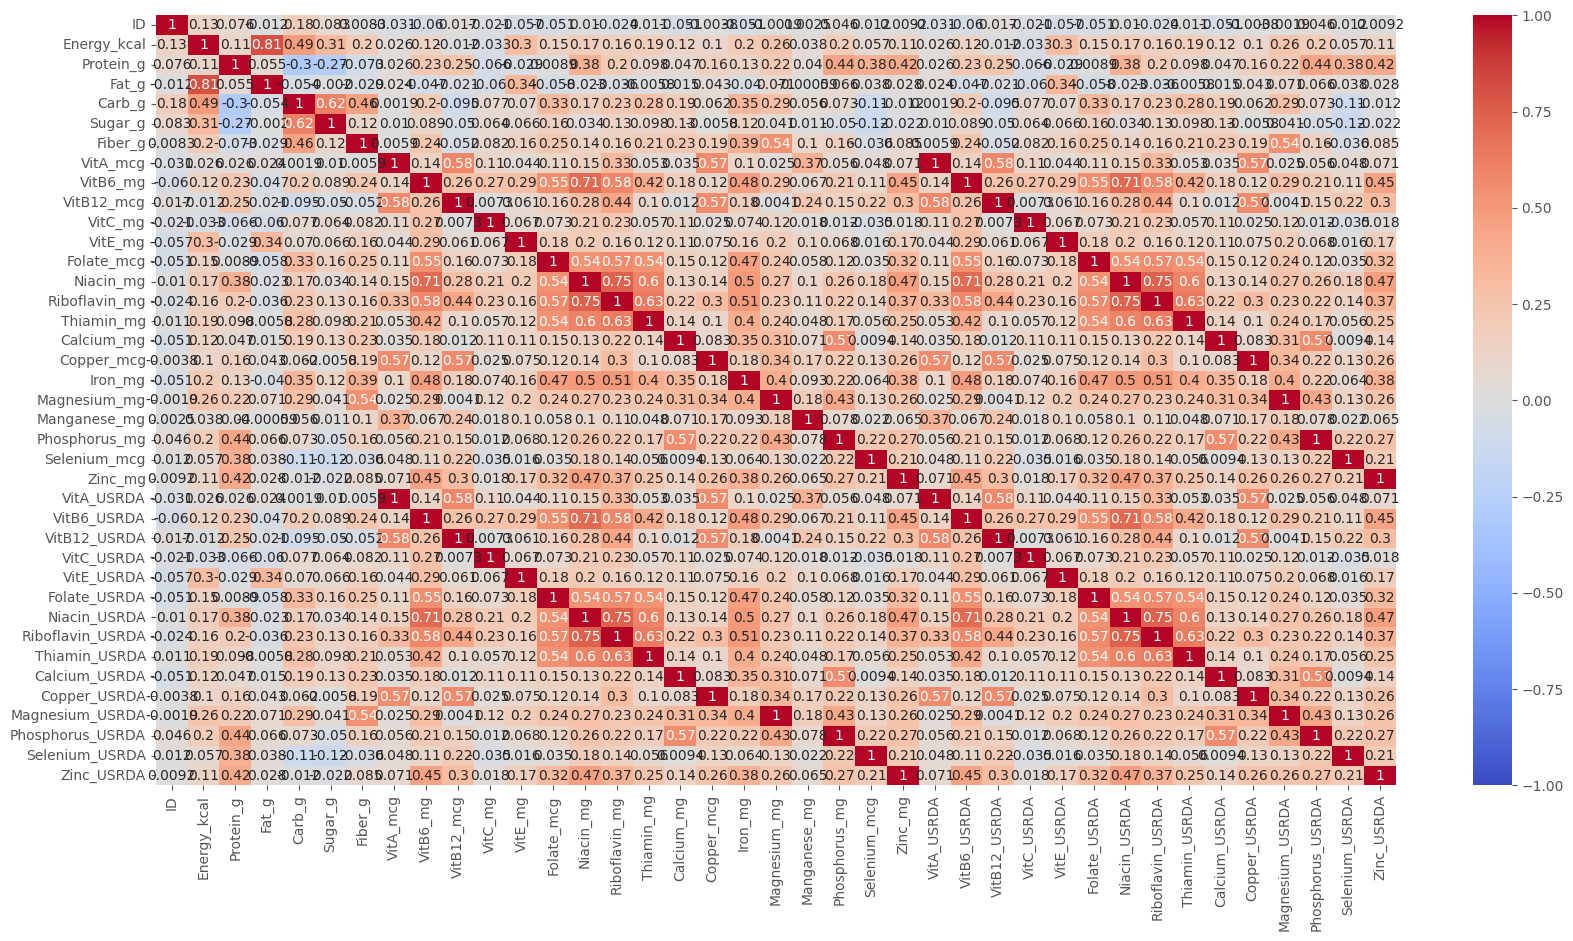

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only= True), vmin = -1, annot = True, cmap = 'coolwarm')

Las USRDA, son lo mismo que las mcg y mg, así que nos las cargaremos

In [4]:
df2 = df.iloc[:,:-15]

In [5]:
df2.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


<Axes: >

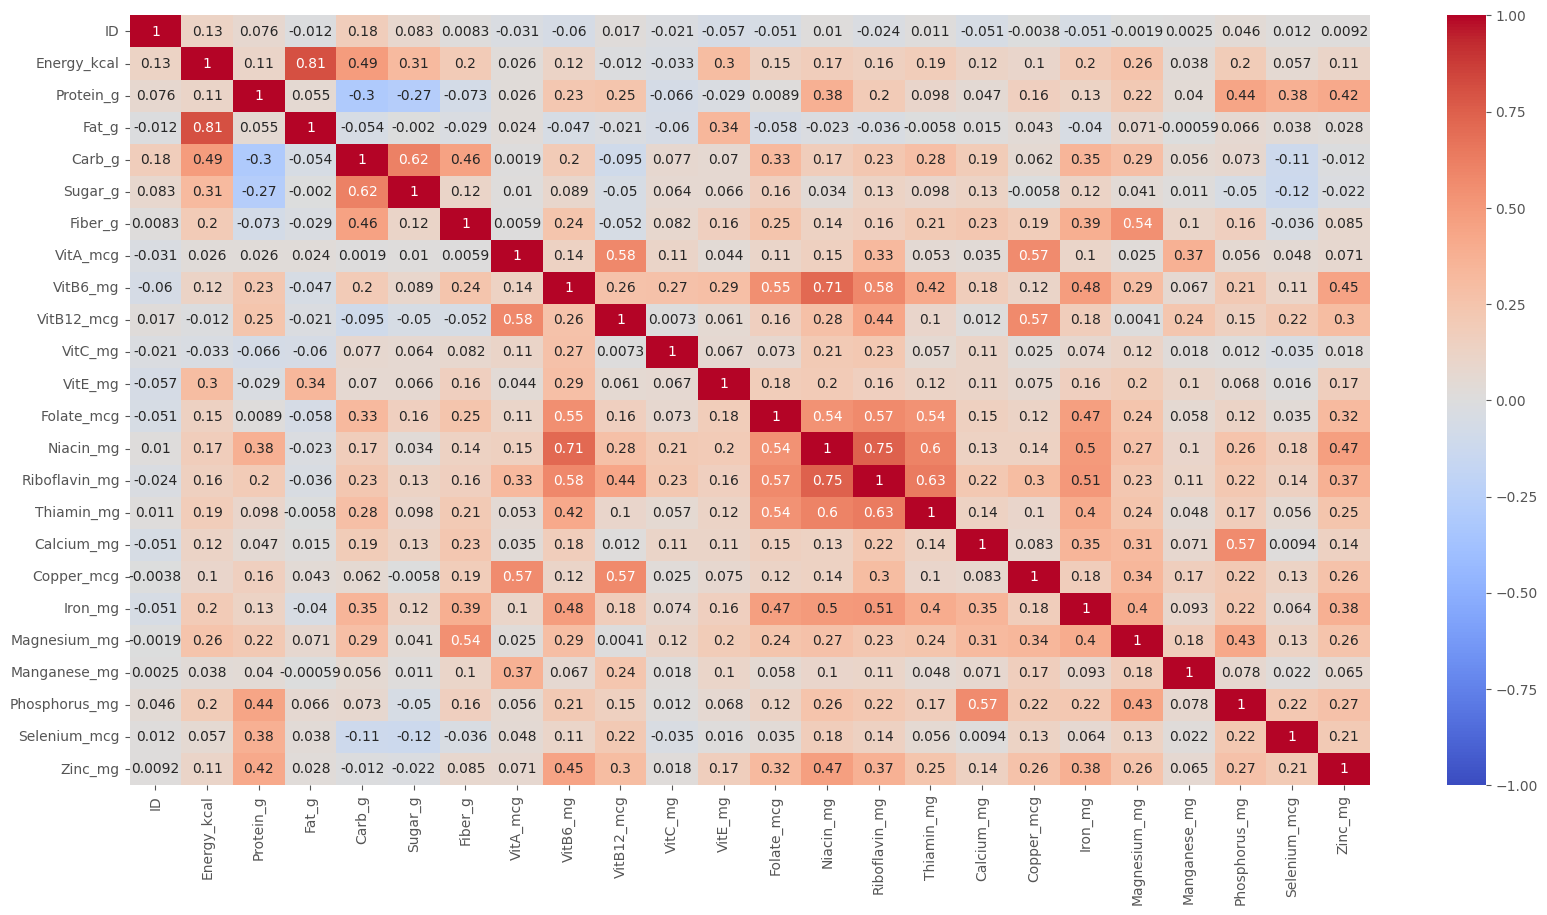

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(numeric_only= True), vmin = -1, annot = True, cmap = 'coolwarm')

### Variables no numéricas
Elimina las variables de texto del dataset

In [7]:
df_numerico = df2.select_dtypes(include='number')

In [8]:
df_numerico

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [9]:
df_numerico = np.log(df_numerico[df_numerico > 0])

In [10]:
df_numerico.fillna(0, inplace=True)

In [11]:
df_numerico

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.908755,6.575076,-0.162519,4.395806,-2.813411,-2.813411,0.0,6.527958,-5.809143,-1.771957,...,-3.381395,-5.298317,3.178054,0.000000,-3.912023,0.693147,0.000000,3.178054,0.000000,-2.407946
1,6.909753,6.575076,-0.162519,4.395806,-2.813411,-2.813411,0.0,6.527958,-5.809143,-2.040221,...,-3.381395,-5.298317,3.178054,-4.135167,-1.832581,0.693147,-5.521461,3.135494,0.000000,-2.995732
2,6.910751,6.775366,-1.272966,4.599957,0.000000,0.000000,0.0,6.733402,-6.907755,-4.605170,...,-5.298317,-6.907755,1.386294,-6.907755,0.000000,0.000000,0.000000,1.098612,0.000000,-4.605170
3,6.911747,5.866468,3.063391,3.358290,0.850151,-0.693147,0.0,5.288267,-1.795767,0.198851,...,-0.962335,-3.540459,6.269096,-3.218876,-1.171183,3.135494,-4.710531,5.958425,2.674149,0.978326
4,6.912743,5.916202,3.145875,3.390473,1.026042,-0.673345,0.0,5.676754,-2.733368,0.231112,...,-1.046969,-4.268698,6.513230,-3.729701,-0.843970,3.178054,-4.422849,6.111467,2.674149,0.955511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,11.327920,5.720312,2.917771,3.222868,0.000000,0.000000,0.0,3.850148,-0.891598,2.484907,...,-1.660731,-3.912023,4.189655,-2.302585,0.336472,4.094345,0.000000,5.537334,4.295924,0.095310
8614,11.410228,4.709530,3.022374,-0.174353,1.688249,0.000000,0.0,0.693147,-2.189256,0.765468,...,-3.729701,-4.422849,2.302585,-3.411248,-0.544727,3.610918,-3.540459,6.054439,3.077312,0.438255
8615,11.412884,5.594711,0.000000,0.000000,4.292375,4.293195,0.0,0.000000,0.000000,0.000000,...,-2.813411,-2.040221,2.564949,-3.912023,1.280934,2.302585,0.000000,2.079442,-0.356675,-1.660731
8616,11.413768,4.499810,2.778819,0.336472,0.693147,0.000000,0.0,3.401197,-2.040221,-0.693147,...,-2.120264,-4.605170,2.302585,-0.916291,1.252763,5.521461,0.000000,5.605802,3.310543,0.000000


### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaller = StandardScaler()
x = df_numerico
std_scaller.fit_transform(x)

array([[-3.48134113,  1.5223473 , -1.4131782 , ..., -0.6116911 ,
        -0.8634684 , -1.70896069],
       [-3.47996545,  1.5223473 , -1.4131782 , ..., -0.63617696,
        -0.8634684 , -2.13310682],
       [-3.47859114,  1.72406589, -2.21187134, ..., -1.80805774,
        -0.8634684 , -3.29447521],
       ...,
       [ 2.72419416,  0.5349915 , -1.29628583, ..., -1.24375652,
        -1.07738509, -1.16977171],
       [ 2.72541179, -0.56771834,  0.70239074, ...,  0.78506708,
         1.12203805,  0.02860986],
       [ 2.77090181, -0.57897132,  0.85117751, ...,  0.54754453,
         0.82866065,  0.02860986]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=12))
pca_pipe.fit(df_numerico)
result = pca_pipe.transform(df_numerico)
modelo_pca = pca_pipe['pca']

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [16]:
df_prueba_PCs = pd.DataFrame(
    result,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12' ]
)
df_prueba_PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-4.259319,-1.353458,0.309588,-2.191971,-4.310441,-4.002287,2.068607,-2.322481,-0.820274,-2.144297,-0.453491,0.306814
1,-4.565324,-3.356392,1.048099,-2.129178,-4.595680,-2.646404,1.884905,-1.881378,-1.354926,-0.431083,-0.261685,-0.255410
2,-7.302740,-1.325370,2.470285,-4.595117,-4.513171,-2.221338,1.993774,-1.641870,-2.727717,-0.990364,-0.969764,0.034153
3,0.907279,-2.823447,1.893672,0.370851,-3.737980,-0.585132,-0.954962,-1.719474,0.579821,-0.155090,0.386612,-0.301746
4,0.240732,-2.960460,2.511917,-0.087578,-3.893246,-0.675716,-0.565281,-2.097449,1.090533,-0.664733,0.651073,-0.259589


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.25522484 0.40268983 0.52491577 0.60013557 0.65891807 0.69914921
 0.73873429 0.77089525 0.79743815 0.82322668 0.84556439 0.86728809]


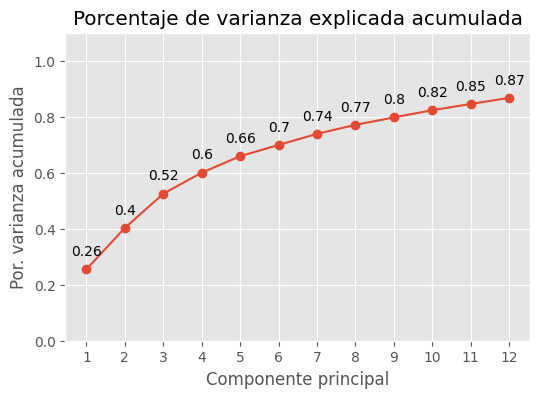

In [17]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(prop_varianza_acum)) + 1,
    prop_varianza_acum,
    marker='o'
)

for x, y in zip(np.arange(len(prop_varianza_acum)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Quizá nos quedaríamos con PC = 7

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [18]:
pca_pipe2 = make_pipeline(StandardScaler(), PCA(n_components=7))
result2 = pca_pipe2.fit_transform(df_numerico)

In [19]:
df_final = pd.DataFrame(
    result2,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
)
df_prueba_PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-4.259319,-1.353458,0.309588,-2.191971,-4.310441,-4.002287,2.068607,-2.322481,-0.820274,-2.144297,-0.453491,0.306814
1,-4.565324,-3.356392,1.048099,-2.129178,-4.595680,-2.646404,1.884905,-1.881378,-1.354926,-0.431083,-0.261685,-0.255410
2,-7.302740,-1.325370,2.470285,-4.595117,-4.513171,-2.221338,1.993774,-1.641870,-2.727717,-0.990364,-0.969764,0.034153
3,0.907279,-2.823447,1.893672,0.370851,-3.737980,-0.585132,-0.954962,-1.719474,0.579821,-0.155090,0.386612,-0.301746
4,0.240732,-2.960460,2.511917,-0.087578,-3.893246,-0.675716,-0.565281,-2.097449,1.090533,-0.664733,0.651073,-0.259589


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [20]:
df_final['FoodGroup'] = df['FoodGroup']
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,FoodGroup
0,-4.259319,-1.353458,0.309588,-2.191971,-4.310441,-4.002287,2.068607,Dairy and Egg Products
1,-4.565324,-3.356392,1.048099,-2.129178,-4.595680,-2.646404,1.884905,Dairy and Egg Products
2,-7.302740,-1.325370,2.470285,-4.595117,-4.513171,-2.221338,1.993774,Dairy and Egg Products
3,0.907279,-2.823447,1.893672,0.370851,-3.737980,-0.585132,-0.954962,Dairy and Egg Products
4,0.240732,-2.960460,2.511917,-0.087578,-3.893246,-0.675716,-0.565281,Dairy and Egg Products


In [22]:
df_groups = df_final.groupby('FoodGroup').mean()
df_groups.sort_values('PC1', ascending= False).head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
FoodGroup,,,,,,,
Breakfast Cereals,2.815406,2.495071,1.020483,1.102666,-0.056841,0.619758,-0.614274
Nut and Seed Products,2.642289,1.726612,1.120023,-0.561056,0.323092,-1.078342,0.429172
Snacks,1.851222,1.676417,1.109455,-0.795897,0.377927,-0.148938,0.597071
